<a href="https://colab.research.google.com/github/DevilNReality/HR-Analytics/blob/main/Code%20File/HR_Analtyics_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries And Datasets

In [1]:
#Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Models Selection
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
# Evaluators
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [2]:
train = pd.read_csv("/content/train_LZdllcl (2).csv")
test  = pd.read_csv("/content/test_2umaH9m (2).csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


# Exploratory Data Analysis

## Uni-Varient

In [5]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
numerical_cols = train.select_dtypes(include=np.number).columns
train_skew = train[numerical_cols].skew()
print(train_skew)

employee_id            -0.003128
no_of_trainings         3.445434
age                     1.007432
previous_year_rating   -0.310638
length_of_service       1.738061
KPIs_met >80%           0.619909
awards_won?             6.338914
avg_training_score      0.451908
is_promoted             2.972339
dtype: float64


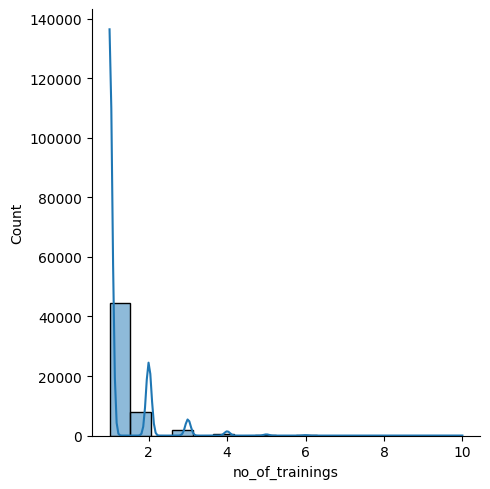

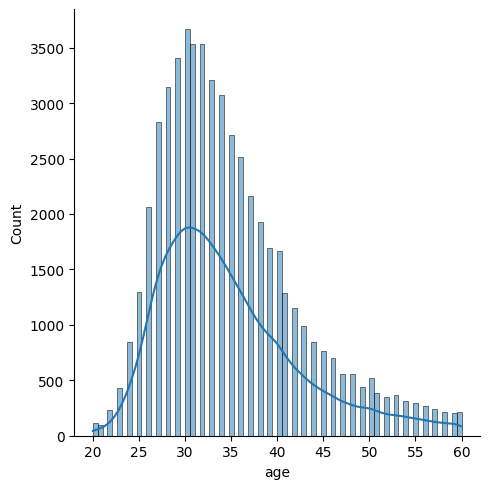

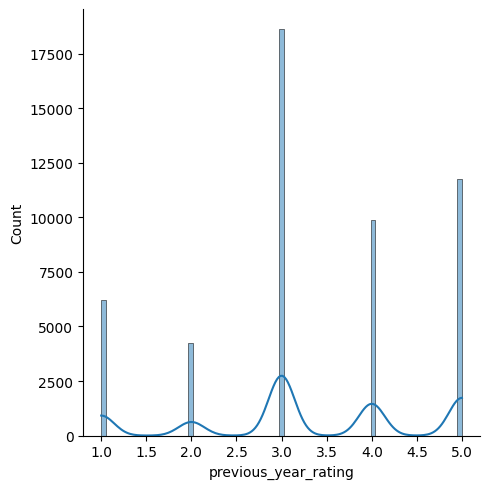

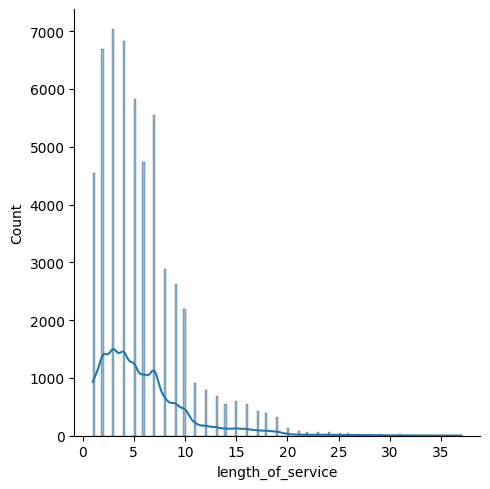

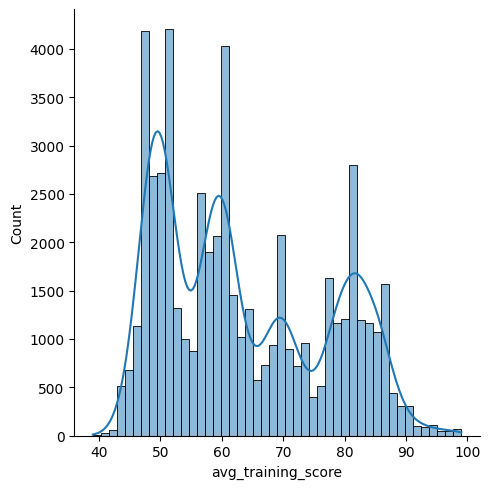

In [7]:
for i in train.columns:
  if i in ['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']:
    sns.displot(train[i],kde=True)
  else:
    continue

In [8]:
columns_to_plot = ['department','region','education','gender','recruitment_chanel','KPIs_met >80%','awards_won?','is_promoted']

In [9]:
train['is_promoted'].value_counts()

,count
is_promoted,
0,50140
1,4668


<Axes: xlabel='department'>

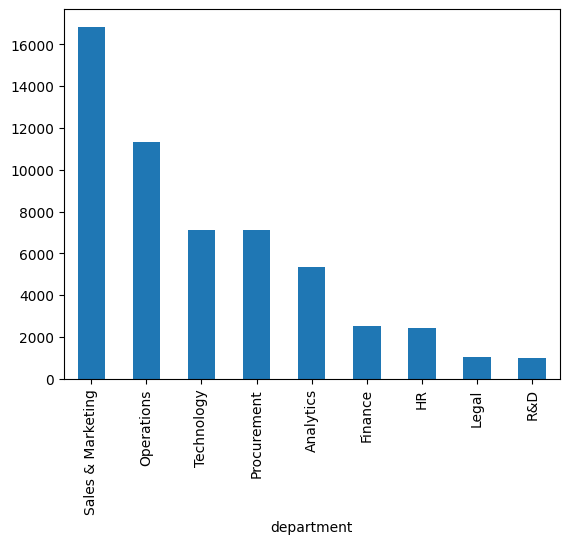

In [10]:
train['department'].value_counts().plot(kind='bar')

## Bi-Varient

In [11]:
#plt.figure(figsize=(12,10))
#sns.heatmap(train.corr(), annot=True, cmap='BuPu')

In [12]:
categ_columns = train.select_dtypes(include=['object'])
categ_columns.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

# Data Preparation

In [13]:
train['education'].mode([0])

,education
0,Bachelor's


<Axes: xlabel='previous_year_rating'>

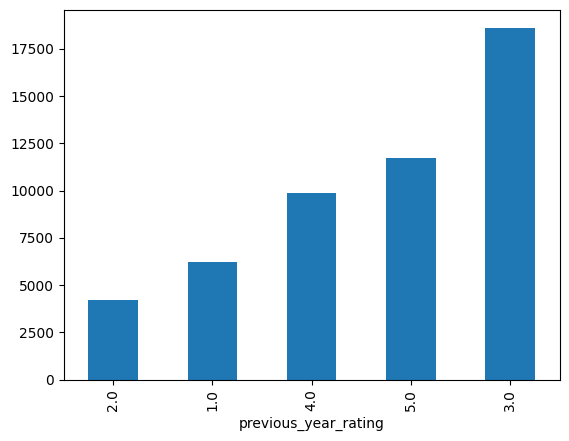

In [14]:
train['previous_year_rating'].value_counts().sort_values().plot(kind='bar')

In [15]:
train['education'] = np.where(train['education'].isna(), train['education'].mode(dropna=True)[0], train['education'])
train['previous_year_rating'] = np.where(train['previous_year_rating'].isna(), train['previous_year_rating'].median(skipna=True), train['previous_year_rating'])

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [17]:
train['previous_year_rating'] = train['previous_year_rating'].astype('int')

## Encoding

In [18]:
train_enc = pd.get_dummies(train)

In [19]:
train_enc.drop(['employee_id'], axis=1, inplace=True)

In [20]:
train_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   no_of_trainings               54808 non-null  int64
 1   age                           54808 non-null  int64
 2   previous_year_rating          54808 non-null  int64
 3   length_of_service             54808 non-null  int64
 4   KPIs_met >80%                 54808 non-null  int64
 5   awards_won?                   54808 non-null  int64
 6   avg_training_score            54808 non-null  int64
 7   is_promoted                   54808 non-null  int64
 8   department_Analytics          54808 non-null  bool 
 9   department_Finance            54808 non-null  bool 
 10  department_HR                 54808 non-null  bool 
 11  department_Legal              54808 non-null  bool 
 12  department_Operations         54808 non-null  bool 
 13  department_Procurement        5

# Divide Data into X and Y

In [21]:
y = train['is_promoted']
x = train_enc

In [22]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [23]:
print(x.shape)
print(y.shape)

(100280, 59)
(100280,)


<Axes: xlabel='is_promoted'>

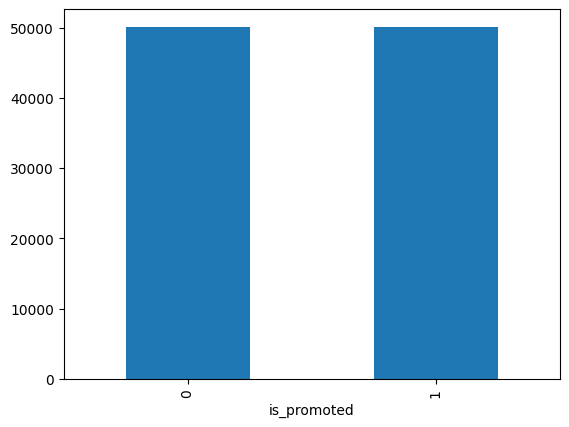

In [24]:
y.value_counts().plot(kind='bar')

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=123)

In [26]:
x_train.drop(['is_promoted'], axis = 1, inplace = True)
x_test.drop(['is_promoted'], axis = 1, inplace = True)

# Multi-Varient

## Logistic Regression

In [27]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
def model_eval(actual, predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  acc_score = accuracy_score(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('The Accuracy of the model is: ', round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

In [29]:
y_hat_train_lr = lr.predict(x_train)
y_hat_test_lr = lr.predict(x_test)

In [30]:
model_eval(y_train, y_hat_train_lr)

The Accuracy of the model is:  0.9
[[36990  2955]
 [ 5236 35043]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     39945
           1       0.92      0.87      0.90     40279

    accuracy                           0.90     80224
   macro avg       0.90      0.90      0.90     80224
weighted avg       0.90      0.90      0.90     80224



In [31]:
model_eval(y_test, y_hat_test_lr)

The Accuracy of the model is:  0.9
[[9433  762]
 [1289 8572]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     10195
           1       0.92      0.87      0.89      9861

    accuracy                           0.90     20056
   macro avg       0.90      0.90      0.90     20056
weighted avg       0.90      0.90      0.90     20056



## Decision Tree

In [32]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
y_hat_test_dtree = dtree.predict(x_test)
y_hat_train_dtree = dtree.predict(x_train)

In [34]:
model_eval(y_train, y_hat_train_dtree)

The Accuracy of the model is:  1.0
[[39940     5]
 [    9 40270]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39945
           1       1.00      1.00      1.00     40279

    accuracy                           1.00     80224
   macro avg       1.00      1.00      1.00     80224
weighted avg       1.00      1.00      1.00     80224



In [35]:
model_eval(y_test, y_hat_test_dtree)

The Accuracy of the model is:  0.94
[[9440  755]
 [ 481 9380]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10195
           1       0.93      0.95      0.94      9861

    accuracy                           0.94     20056
   macro avg       0.94      0.94      0.94     20056
weighted avg       0.94      0.94      0.94     20056



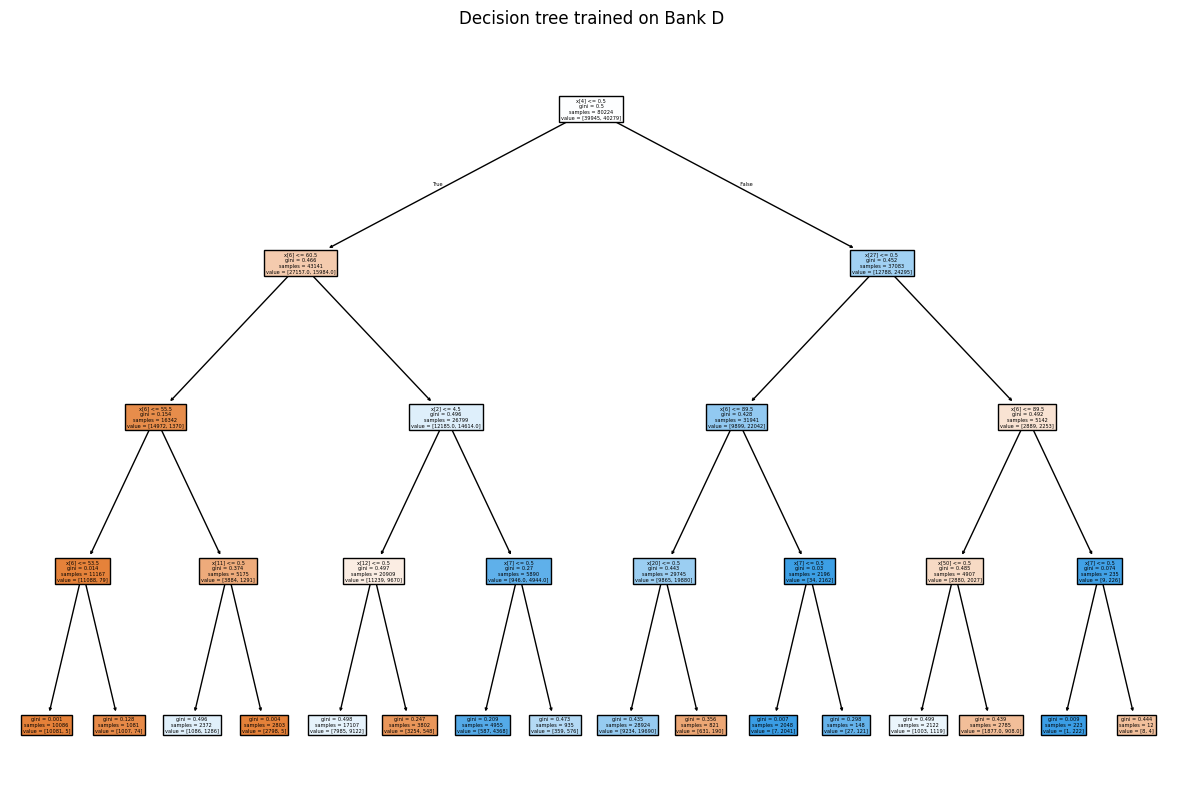

In [36]:
plt.figure(figsize=(15,10))
clf=DecisionTreeClassifier(max_depth=4)
clf.fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on Bank D")
plt.show()

## Random Forest

In [37]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
y_hat_train_rf=rf.predict(x_train)
y_hat_test_rf=rf.predict(x_test)

In [39]:
model_eval(y_test, y_hat_test_rf)

The Accuracy of the model is:  0.96
[[9979  216]
 [ 531 9330]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     10195
           1       0.98      0.95      0.96      9861

    accuracy                           0.96     20056
   macro avg       0.96      0.96      0.96     20056
weighted avg       0.96      0.96      0.96     20056



In [40]:
model_eval(y_test, y_hat_test_rf)

The Accuracy of the model is:  0.96
[[9979  216]
 [ 531 9330]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     10195
           1       0.98      0.95      0.96      9861

    accuracy                           0.96     20056
   macro avg       0.96      0.96      0.96     20056
weighted avg       0.96      0.96      0.96     20056



## AdaBoost

In [41]:
ada=AdaBoostClassifier()
ada.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [42]:
y_hat_train_ada = ada.predict(x_train)
y_hat_test_ada = ada.predict(x_test)

In [43]:
model_eval(y_train, y_hat_train_ada)

The Accuracy of the model is:  0.88
[[35674  4271]
 [ 5734 34545]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     39945
           1       0.89      0.86      0.87     40279

    accuracy                           0.88     80224
   macro avg       0.88      0.88      0.88     80224
weighted avg       0.88      0.88      0.88     80224



In [44]:
model_eval(y_test, y_hat_test_ada)

The Accuracy of the model is:  0.88
[[9092 1103]
 [1364 8497]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     10195
           1       0.89      0.86      0.87      9861

    accuracy                           0.88     20056
   macro avg       0.88      0.88      0.88     20056
weighted avg       0.88      0.88      0.88     20056



## Gradient Boost

In [45]:
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [46]:
y_hat_train_gb=gb.predict(x_train)
y_hat_test_gb=gb.predict(x_test)

In [47]:
model_eval(y_train, y_hat_train_gb)

The Accuracy of the model is:  0.9
[[36223  3722]
 [ 3984 36295]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     39945
           1       0.91      0.90      0.90     40279

    accuracy                           0.90     80224
   macro avg       0.90      0.90      0.90     80224
weighted avg       0.90      0.90      0.90     80224



In [48]:
model_eval(y_test, y_hat_test_gb)

The Accuracy of the model is:  0.9
[[9259  936]
 [ 989 8872]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     10195
           1       0.90      0.90      0.90      9861

    accuracy                           0.90     20056
   macro avg       0.90      0.90      0.90     20056
weighted avg       0.90      0.90      0.90     20056



## XG Boosting

In [49]:
le=LabelEncoder()
y_train_enc=le.fit_transform(y_train)
y_test_enc=le.fit_transform(y_test)

In [50]:
xgb=XGBClassifier()
xgb.fit(x_train, y_train_enc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [51]:
y_hat_train_xgb = xgb.predict(x_train)
y_hat_test_xgb = xgb.predict(x_test)

In [52]:
model_eval(y_train_enc, y_hat_train_xgb)

The Accuracy of the model is:  0.96
[[39460   485]
 [ 2865 37414]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     39945
           1       0.99      0.93      0.96     40279

    accuracy                           0.96     80224
   macro avg       0.96      0.96      0.96     80224
weighted avg       0.96      0.96      0.96     80224



In [53]:
model_eval(y_test_enc, y_hat_test_xgb)

The Accuracy of the model is:  0.95
[[9986  209]
 [ 740 9121]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10195
           1       0.98      0.92      0.95      9861

    accuracy                           0.95     20056
   macro avg       0.95      0.95      0.95     20056
weighted avg       0.95      0.95      0.95     20056



## KNearestNeighbors

In [54]:
acc_list = []
for i in range(1,10):
  knn2 = KNeighborsClassifier(n_neighbors = i)
  knn2.fit(x_train , y_train)
  y_hat_test_knn2 = knn2.predict(x_test)
  acc_list.append(round(accuracy_score(y_test , y_hat_test_knn2) , 2))
print(acc_list)

[0.89, 0.92, 0.87, 0.89, 0.85, 0.87, 0.84, 0.86, 0.83]


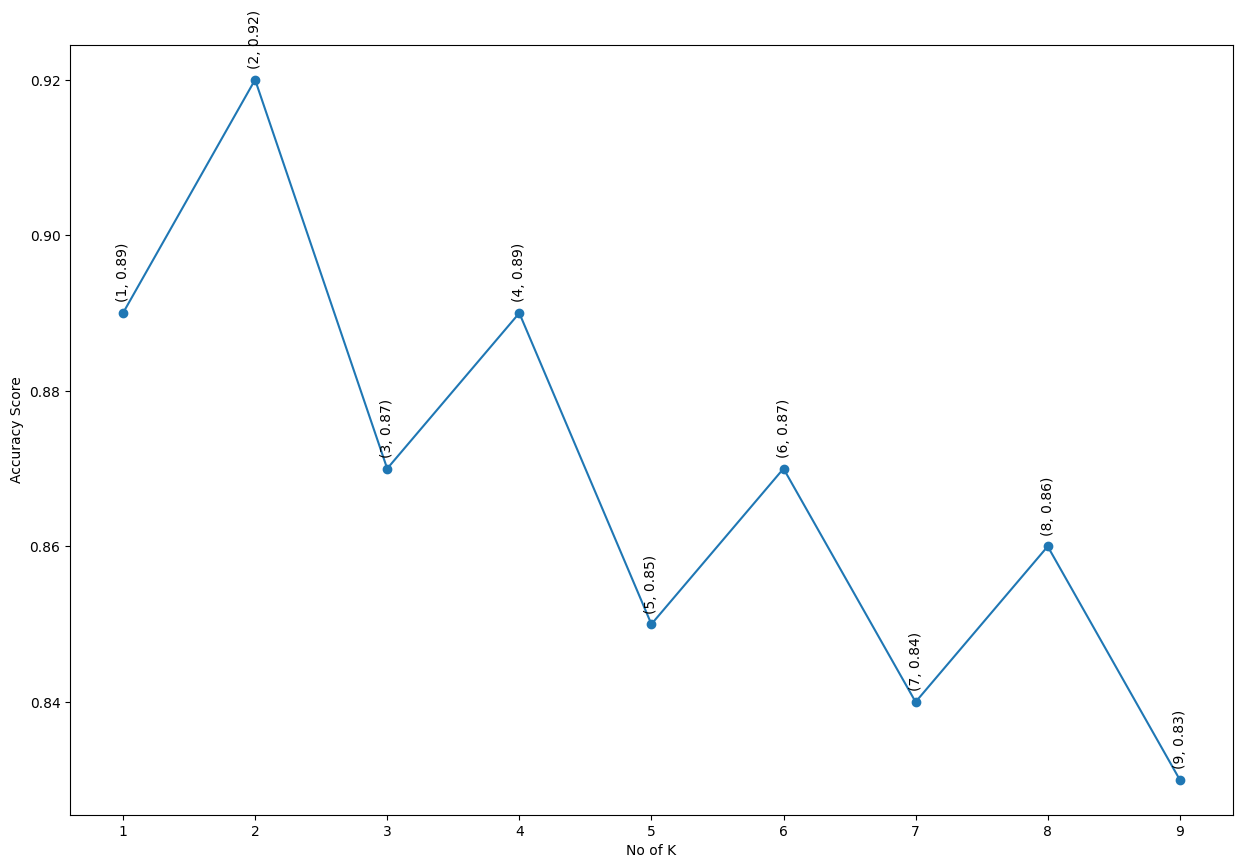

In [55]:
x = np.array([i for i in range(1,10)])
y = acc_list
plt.figure(figsize=(15, 10))
plt.plot(x, y, marker='o', linestyle='-')
# Add annotations
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(f'({xi}, {yi})', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center' , rotation = 90)
plt.xlabel("No of K")
plt.ylabel("Accuracy Score")
plt.show()

In [56]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train , y_train )

KNeighborsClassifier(n_neighbors=2)

In [57]:
y_hat_train_knn = knn.predict(x_train)
y_hat_test_knn = knn.predict(x_test)

In [58]:
model_eval(y_train , y_hat_train_knn)

The Accuracy of the model is:  1.0
[[39942     3]
 [  345 39934]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     39945
           1       1.00      0.99      1.00     40279

    accuracy                           1.00     80224
   macro avg       1.00      1.00      1.00     80224
weighted avg       1.00      1.00      1.00     80224



In [59]:
model_eval(y_test , y_hat_test_knn)

The Accuracy of the model is:  0.92
[[8723 1472]
 [ 213 9648]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.91     10195
           1       0.87      0.98      0.92      9861

    accuracy                           0.92     20056
   macro avg       0.92      0.92      0.92     20056
weighted avg       0.92      0.92      0.92     20056



## Support Vector Machine

In [ ]:
svm = SVC()

svm.fit(x_train, y_train)

SVC()

In [ ]:
y_hat_train_svm=svm.predict(x_train)
y_hat_test_svm=svm.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_svm)

The Accuracy of the model is:  0.83
[[32343  7602]
 [ 6131 34148]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82     39945
           1       0.82      0.85      0.83     40279

    accuracy                           0.83     80224
   macro avg       0.83      0.83      0.83     80224
weighted avg       0.83      0.83      0.83     80224



In [ ]:
model_eval(y_test,y_hat_test_svm)

The Accuracy of the model is:  0.83
[[8240 1955]
 [1481 8380]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     10195
           1       0.81      0.85      0.83      9861

    accuracy                           0.83     20056
   macro avg       0.83      0.83      0.83     20056
weighted avg       0.83      0.83      0.83     20056



### SVC with Randomized Search CV

In [ ]:
params = {
    "C": np.arange(2, 10, 2),
    "degree": (3, 4, 5, 6),
    "kernel": ["linear", "poly", "rbf", "sigmoid"]
}


In [ ]:
random_search_cv=RandomizedSearchCV(estimator=svm,param_distributions=params,verbose=True)

In [ ]:
random_search_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
random_search_cv.best_params_

## Naive Bayes

In [60]:
nb = GaussianNB()

nb.fit(x_train , y_train)

GaussianNB()

In [61]:
y_hat_train_nb = nb.predict(x_train)
y_hat_test_nb = nb.predict(x_test)

In [62]:
model_eval(y_train , y_hat_train_nb)

The Accuracy of the model is:  0.75
[[23204 16741]
 [ 3422 36857]]
              precision    recall  f1-score   support

           0       0.87      0.58      0.70     39945
           1       0.69      0.92      0.79     40279

    accuracy                           0.75     80224
   macro avg       0.78      0.75      0.74     80224
weighted avg       0.78      0.75      0.74     80224



In [63]:
model_eval(y_test , y_hat_test_nb)

The Accuracy of the model is:  0.74
[[5894 4301]
 [ 866 8995]]
              precision    recall  f1-score   support

           0       0.87      0.58      0.70     10195
           1       0.68      0.91      0.78      9861

    accuracy                           0.74     20056
   macro avg       0.77      0.75      0.74     20056
weighted avg       0.78      0.74      0.74     20056



# Model Performance

In [64]:
accuracy_table=[['Logistic Regression',round(accuracy_score(y_test , y_hat_test_lr),2)],
  ['Decision Tree', round(accuracy_score(y_test , y_hat_test_dtree),2)],
  ['Random Forest' , round(accuracy_score(y_test , y_hat_test_rf),2)],
  ['Ada Boosting' , round(accuracy_score(y_test , y_hat_test_ada),2)],
  ['Gradient Boosting' , round(accuracy_score(y_test , y_hat_test_gb),2)],
  ['XGBoosting' , round(accuracy_score(y_test_enc, y_hat_test_xgb),2)],
  ['KNN' , round(accuracy_score(y_test , y_hat_test_knn),2)],
  #['SVM', round(accuracy_score(y_test , y_hat_test_svm),2)],
  ['Naive Bayes' , round(accuracy_score(y_test , y_hat_test_nb),2)]             ]
df1 = pd.DataFrame(accuracy_table, columns = ['Model','Test_Accuracy'])
print(df1)

                 Model  Test_Accuracy
0  Logistic Regression           0.90
1        Decision Tree           0.94
2        Random Forest           0.96
3         Ada Boosting           0.88
4    Gradient Boosting           0.90
5           XGBoosting           0.95
6                  KNN           0.92
7          Naive Bayes           0.74


# Application on Test Dataset

In [65]:
test['education'] = np.where(test['education'].isna(), test['education'].mode(dropna=True)[0], test['education'])
test['previous_year_rating'] = np.where(test['previous_year_rating'].isna(), test['previous_year_rating'].median(skipna=True), test['previous_year_rating'])

In [66]:
test['previous_year_rating'] = test['previous_year_rating'].astype('int')

In [67]:
test_enc = pd.get_dummies(test)

In [68]:
test_enc.drop(['employee_id'] , axis = 1 , inplace = True)

In [69]:
test['is_promoted'] = rf.predict(test_enc)

# Submission File

In [70]:
submission_file = pd.read_csv('/content/sample_submission_M0L0uXE (2).csv')

In [71]:
submission_file.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [72]:
submission_file['is_promoted'] = test['is_promoted']

In [73]:
submission_file['is_promoted'].value_counts()

,count
is_promoted,
0,22384
1,1106


In [74]:
submission_file.to_csv('submission.csv' , index = False)